<center>به نام خدا</center>
<br>
<center> درس بازیابی پیشرفته اطلاعات - بهار ۱۴۰۰ - ۱۴۰۱ </center>
<br>
<center> تمرین چهارم - خوشه بندی</center>

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

# address = "MIRNews1401"
# import sys
# sys.path.append('/content/drive/My Drive/{}'.format(address))
# %cd /content/drive/My\ Drive/$address

Mounted at /content/drive
/content/drive/My Drive/MIRNews1401


In [6]:
import json
import math
from tqdm import tqdm
# from hazm import *
import numpy as np

# 1. load data and preprocessing

In [ ]:
# dictData = {}
# with open("news_all_text.json", encoding="utf8") as d:
#     dictData = json.load(d)

In [ ]:
# stop_words = stopwords_list()
# normalizer = Normalizer()
# lemmatizer = Lemmatizer()

# def preprocess_text(document):
#         document = normalizer.normalize(document)
        
#         tokens = word_tokenize(document)
#         tokens = [lemmatizer.lemmatize(word) for word in tokens]
#         tokens = [word for word in tokens if word not in stop_words]
#         tokens = [word for word in tokens if len(word) > 2]

#         preprocessed_text = ' '.join(tokens)

#         return preprocessed_text

<div dir=rtl>
این تابع متن و آدرس هر فایل readme را دریافت می‌کند. ابتدا آن را پیش‌پردازش می‌کند. در صورتی که حداقل نصف کاراکترهای آن باقی بماند آن را در نظر می‌گیرد. در غیر اینصورت احتمالا بیشتر حروف زائد و یا غیرانگلیسی است.
</div>

In [ ]:
# news_list = []
# news_details = []

<div dir=rtl>
در قسمت زیر همه‌ی فایل‌های استخراج شده را لود میکنیم و با استفاده از قسمت‌های فوق آن ها را بررسی می‌کنیم.
</div>

In [ ]:
# news_list.clear()
# news_details.clear()
# for new in dictData:
#     try:
#         changed_text = preprocess_text(new['title'])
#         news_list.append(changed_text)
#         news_details.append({'url':new['url'], 'id': new['id'], 'title': new['title']})
#     except:
#         pass

In [ ]:
# len(news_list)

5000

In [ ]:
# np.save("./data/news_details", news_details)

<div dir=rtl>
در قسمت 2 بر روی فایل‌های معتبر، کدگذاری صورت می‌گیرد و آن ها را به صورت برداری در می‌آورد. برای این کار از روش Sentence transformer استفاده می‌شود.
</div>

# 2. create embedding of docs using sentence transformer

In [1]:
# !pip install sentence_transformers

In [ ]:
# from sentence_transformers import util, SentenceTransformer

In [ ]:
# transformer_model = SentenceTransformer('m3hrdadfi/bert-fa-base-uncased-wikinli-mean-tokens')

<div dir=rtl>
در بلاک زیر، با استفاده از مدل دریافت شده، لیست فایل‌ها را کدگذاری می‌کنیم. مشابه حالت قبل نتیجه را برای استفاه‌های بعدی ذخیره می‌کنیم.
</div>

In [ ]:
# transformer_doc_embeddings = transformer_model.encode(news_list, convert_to_tensor=True, show_progress_bar=True)

In [ ]:
# transformer_doc_embeddings.shape

In [ ]:
# np.save("./data/transformer_doc_embeddings", transformer_doc_embeddings)

<div dir=rtl>
بخش 3 قسمت اصلی تمرین و خوشه‌بندی را انجام می‌دهد.
</div>

# 3. clustering

In [7]:
from sklearn.cluster import KMeans

<div dir=rtl>
داده‌های ذخیره شده را بازیابی می‌کنیم. یعنی همان بردارهای متناظر هر سند و آدرس نسبی آن‌ها. توجه کنید که همه‌ی بردارها l2-norm هستند.
</div>

In [17]:
doc_embeddings = np.load("./data/transformer_doc_embeddings.npy")

In [9]:
news_details = np.load("./data/news_details.npy", allow_pickle=True)

<div dir=rtl>
در بلاک زیر الگوریتم K-means بر روی داده‌ها اجرا می‌شود. به ازای تعداد خوشه‌های مختلف الگوریتم را اجرا کردیم و بهترین نتیجه را بر روی 5 گرفتیم. البته به ازای random_state های مختلف ممکن است کمی نتیجه متفاوت باشد. الگوریتم 10 بار اجرا می‌شود و بهترین نتیجه ذخیره می‌شود. <br>
در predicted_label لیبل هر سند ذخیره می‌شود. <br>
در transformed_space یک بردار از هر سند ذخیره می‌شود که به نوعی با خوشه‌ی آن در ارتباط است.
</div>

In [18]:
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, tol=1e-6, random_state=0)
predicted_label = kmeans.fit_predict(doc_embeddings)

In [19]:
np.save("./data/cluster_label", predicted_label)

In [ ]:
predicted_label = np.load("./data/cluster_label.npy")

<div dir=rtl>
معیار RSS در کادر زیر مشخص است.
</div>

In [20]:
print("RSS: " + str(kmeans.inertia_))

RSS: 526996.375


<div dir=rtl>
در دو کادر زیر از دو معیار مختلف استفاده شده است. برای اطلاعات بیشتر به لینک‌های مذکور مراجعه کنید. <br>
همچنین در انتهای این notebook توضیحاتی در خصوص این معیار داده شده است.
</div>
 https://en.wikipedia.org/wiki/Silhouette_(clustering)

In [21]:
from sklearn.metrics import silhouette_score
print("average silhouette score: " + str(silhouette_score(doc_embeddings, predicted_label)))

average silhouette score: 0.13868189


for more information, please refer to https://en.wikipedia.org/wiki/Davies%E2%80%93Bouldin_index

In [22]:
from sklearn.metrics import davies_bouldin_score
print("davies bouldin score: " + str(davies_bouldin_score(doc_embeddings, predicted_label)))

davies bouldin score: 2.1705115668201955


<div dir=rtl>
در کادرهای زیر نتیجه خوشه‌بندی به شکل دو بعدی به نمایش درآمده است. تصویر اول از تغییر بعد بردارهای اولیه هر سند به وجود آمده است. تصویر دوم از تغییر بعد transformed_space به دست آمده که احتمالا نتیجه بهتری می‌دهد. چون با خوشه‌بندی سازگارتر است.
</div>

In [23]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(doc_embeddings)

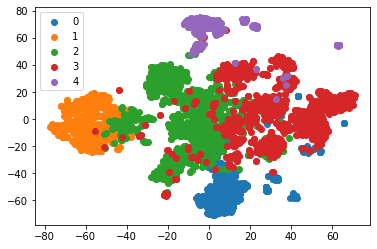

In [24]:
import matplotlib.pyplot as plt

u_labels = np.unique(predicted_label) 

for i in u_labels:
    plt.scatter(X_embedded[predicted_label == i , 0] , X_embedded[predicted_label == i , 1], label = i)
plt.legend()
plt.show()

<div dir=rtl>
در کادر زیر اسامی داده‌های موجود در خوشه‌های مختلف از هم جدا می‌شود و سپس در یک جدول به نمایش در می‌آید. از آنجا که اندازه هر ستون باید با بقیه برابر باشد، به تعدادی از ستون‌ها داده‌ی صفر را اضافه می‌کنیم.
</div>

In [ ]:
import pandas as pd

separated_links = []
num_separated_links = []
for i in u_labels:
    separated_links.append([new_link for new_link in news_links[predicted_label == i]])
    num_separated_links.append(len(separated_links[i]))
    print("number of items in cluster " + str(i) + ": " + str(num_separated_links[i]))

max_num = max(num_separated_links)

for i in u_labels:
    for j in range(max_num - num_separated_links[i]):
        separated_links[i] = np.append(separated_links[i], 0)

data = {}
for i in u_labels:
    data.update({i: separated_links[i]})

df = pd.DataFrame (data, columns = [i for i in range(5)])

number of items in cluster 0: 672
number of items in cluster 1: 799
number of items in cluster 2: 1640
number of items in cluster 3: 1533
number of items in cluster 4: 356


In [ ]:
df[0:20][:]

,0,1,2,3,4
0,https://www.yjc.news/fa/news/8186608/کاشت-گیاه...,https://www.yjc.news/fa/news/7581283/,https://www.yjc.news/fa/news/8177335/حوزه-عفاف...,https://www.yjc.news/fa/news/8182833,https://www.yjc.news/fa/news/8190588/صفحه-نخست...
1,https://www.yjc.news/fa/news/8070891/عودت-واکس...,https://www.yjc.news/fa/news/7238973/,https://www.yjc.news/fa/news/8168796/شهرداری-خ...,https://www.yjc.news/fa/news/8177519/از-ورشکست...,https://www.yjc.news/fa/news/8188168/صفحه-نخست...
2,https://www.yjc.news/fa/news/7983604/زمین-لرزه...,https://www.yjc.news/fa/news/8189521/کسب-چهار-...,https://www.yjc.news/fa/news/8141298/افزایش-حق...,https://www.yjc.news/fa/news/8177329/مجهز-شدن-...,https://www.yjc.news/fa/news/8188128/صفحه-نخست...
3,https://www.yjc.news/fa/news/7972266/,http://www.yjc.news/fa/news/8189223/تیم-المپیا...,https://www.yjc.news/fa/news/8115625/هیچ-کلاس-...,https://www.yjc.news/fa/news/8160849/صفحه-نخست...,https://www.yjc.news/fa/news/8187152
4,https://www.yjc.news/fa/news/7968823/,https://www.yjc.news/fa/news/8182256/برگزاری-ه...,https://www.yjc.news/fa/news/8097932/رئیس‌جمهو...,https://www.yjc.news/fa/news/8159343/پخت-نان-م...,https://www.yjc.news/fa/news/8185794
5,https://www.yjc.news/fa/news/7956512/,https://www.yjc.news/fa/news/8122484/برگزاری-ف...,https://www.yjc.news/fa/news/8078104/حقوق-۶۳-م...,https://www.yjc.news/fa/news/8144665/واکنش-کار...,https://www.yjc.news/fa/news/8184821/صفحه-نخست...
6,https://www.yjc.news/fa/news/7919769/,https://www.yjc.news/fa/news/8190345/پوتین-وار...,https://www.yjc.news/fa/news/8071343,https://www.yjc.news/fa/news/8144282/مدارس-کدا...,https://www.yjc.news/fa/news/8183501/صفحه-نخست...
7,https://www.yjc.news/fa/news/7905042/واکسن-فای...,https://www.yjc.news/fa/news/8184699/تعداد-بلی...,https://www.yjc.news/fa/news/8047598/ثبات-امنی...,https://www.yjc.news/fa/news/8143311/گرد-و-غبا...,https://www.yjc.news/fa/news/8182955/صفحه-نخست...
8,https://www.yjc.news/fa/news/7884775/پنجه-انقر...,https://www.yjc.news/fa/news/8183884/بهادری-جه...,https://www.yjc.news/fa/news/8046372/مشاوره-حق...,https://www.yjc.news/fa/news/8141266,https://www.yjc.news/fa/news/8181501
9,https://www.yjc.news/fa/news/7846797/واکسیناسی...,https://www.yjc.news/fa/news/8182380/وزیر-امور...,https://www.yjc.news/fa/news/8045848/آزادسازی-...,https://www.yjc.news/fa/news/8139781/انتشار-فی...,https://www.yjc.news/fa/news/8180240/صفحه-نخست...
